In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 머신러닝의 종류
* 지도학습 - **데이터와 정답**을 이용해서 패턴/규칙 파악
* 비지도 학습 - **데이터**만을 이용해서 유사도에 따른 패턴/규칙 파악
    + 비지도학습의 대표적인 분석방법 : 군집

## k-means
* 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹으로 만듦
* 즉, 동일 그룹내 구성원간의 유사성은 높지만 다른 그룹의 구성원과의 유사성은 거의 없도록 하는 것
    + 군집분석 SSW, SSB
* prototype based 군집 - 여러번 시도후 완성
    + 각 군집이 처음부터 완성(고정)되어 있는 것은 아니고
      군집화 시도 횟수에 따라 군집의 유형이 변함
* 활용분야
    + 소비자유형 파악 - 타겟 마케팅 적용
    + 범죄율이 높은 지역 검출
    + 이미지/얼굴/손글씨 인식 - SVM
    + 유전자 검사/지리정보를 이용해서 지형 탐사

### kmeans 알고리즘 이해하기

In [19]:
from sklearn.cluster import KMeans

In [2]:
x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

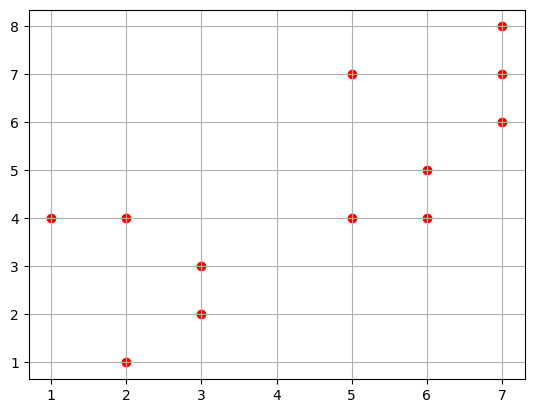

In [8]:
plt.scatter(x,y, color='red')
plt.grid()

## 유사도 파악 
* k-means 에서는 각 점간의 거리로 
* 비슷한 특성을 가지는 데이터를 묶음
* 따라서, 유사도 측정을 위해 임의의 기준점centeroid 선정
* 기준점과 각 점간의 거리 계산
    + 유클리드 거리 계산법 이용
    + 즉, A(x1, y1), B(x2, y2) 간의 거리 계산은
      sqrt((x2-x1)^2 + (y2-y1)^2) 로 함

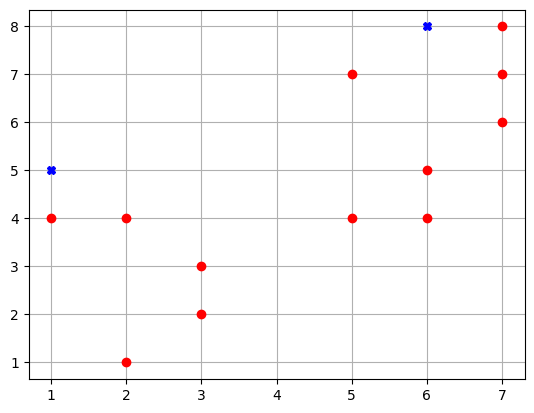

In [9]:
# 기준점 선정 및 시각화
# C1, C2 = (1,5), (6,8)

plt.plot(x, y, 'ro')
plt.plot([1,6], [5,8], 'bX')
plt.grid(True)

In [13]:
import math

# P(5,7)은 C1 또는 C2로 분류될지 알아봄
#         C1(1,5)  C2(6,8)
# P(5,7)    4.47    1.41

print('P ->  C1 = ',math.sqrt((1-5)**2 + (5-7)**2))
print('P ->  C2 = ',math.sqrt((6-5)**2 + (8-7)**2))

P ->  C1 =  4.47213595499958
P ->  C2 =  1.4142135623730951


In [15]:
# P(6,4)은 C1 또는 C2로 분류될지 알아봄
#         C1(1,5)  C2(6,8)
# P(6,4)    5.09     4.0

print('P ->  C1 = ',math.sqrt((1-6)**2 + (5-4)**2))
print('P ->  C2 = ',math.sqrt((6-6)**2 + (8-4)**2))

P ->  C1 =  5.0990195135927845
P ->  C2 =  4.0


In [14]:
# P(2,4)은 C1 또는 C2로 분류될지 알아봄
#         C1(1,5)  C2(6,8)
# P(2,4)    1.41    5.65

print('P ->  C1 = ',math.sqrt((1-2)**2 + (5-4)**2))
print('P ->  C2 = ',math.sqrt((6-2)**2 + (8-4)**2))

P ->  C1 =  1.4142135623730951
P ->  C2 =  5.656854249492381


## 새로운 기준점 선정
* 모든 데이터에 대한 군집화가 수행된 후 
* 새로운 센터노이드를 선정한 후 다시 유사도에 의한 군집 실시
* 새로운 센터노이드를 선정하는 방법은 각 군집별 평균값을 이용
     + 즉, 군집 C1, C2의 각 X, Y 좌표간의 평균 계산

In [16]:
# C1의 새로운 센터노이드 지정
# 새로운 x좌표 : 1,2,2,3,3 / 5 = 2.2
# 새로운 y좌표 : 1,2,3,4,4 / 5 = 2.8

# C2의 새로운 센터노이드 지정
# 새로운 x좌표 : 5,5,6,6,7,7,7 / 7 = 6.14
# 새로운 y좌표 : 4,4,5,6,7,7,8 / 7 = 5.85

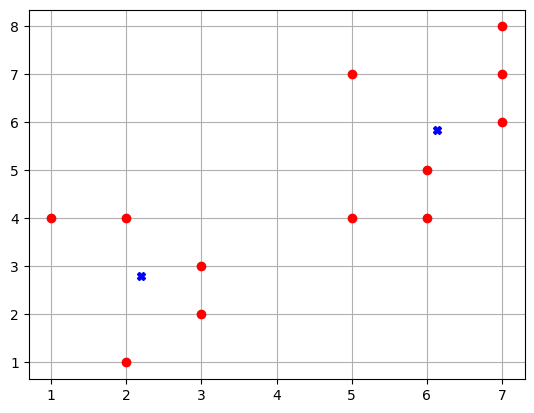

In [17]:
plt.plot(x, y, 'ro')
plt.plot([2.2, 6.14], [2.8, 5.85], 'bX')
plt.grid(True)

### iris 데이터셋을 이용하여 군집분석

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

In [25]:
# n_clusters : 실제 나누려고하는 군집수
# algorithm : 군집시 사용하는 거리계산 알고리즘
kms = KMeans(n_clusters=3, random_state=2208301540)
kms.fit(data)

KMeans(n_clusters=3, random_state=2208301540)

### 군집결과 확인
+ 군집결과는 labels_에 저장

In [26]:
kms.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target, kms.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(target,kms.labels_)

0.8933333333333333

## 실루엣/엘보우 계수
* iris 데이터셋 경우, 각 관측값에 대한 레이블을 알고 있기 때문에 군집성공에 대한 정확도 파악 가능
* 하지만, 레이블이 없는 데이터의 경우 **실루엣 계수**와 **엘보우 그래프(SSE)** 를 통해 적절한 군집 계수를 파악해야 함
    + 실루엣 계수 : 군집 적합도를 수치로 나타낸 것으로 1에 가까울수록 군집이 잘된 것으로 파악
    + 엘보우SSE 계수 : 군집내 오차제곱합을 의미

In [30]:
from sklearn.metrics import silhouette_score

silhouette_score(data, kms.labels_, metric='euclidean')

0.5528190123564095

In [31]:
kms.inertia_

78.85144142614601

### 적절한 군집 갯수 찾기

In [34]:
sss,els = [],[]
for k in range(2, 10+1):
    kms = KMeans(n_clusters=k, random_state=2208301540)
    kms.fit(data)
    
    ss = silhouette_score(data, kms.labels_, metric='euclidean')
    el = kms.inertia_
    
    sss.append(ss)
    els.append(el)

[0.6810461692117462, 0.5528190123564095, 0.4974551890173751, 0.48874888709310566, 0.36648040289008327, 0.35200746716162923, 0.35974549238457626, 0.34595488596099394, 0.31248915673921474] [152.3479517603579, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.054977867477874, 34.42777741702742, 30.064593073593073, 27.86142885623149, 26.150300068352703]


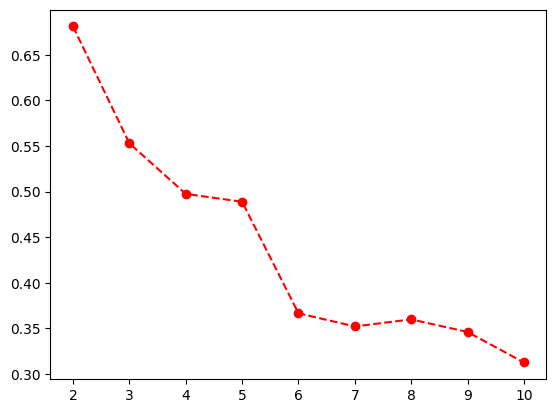

In [37]:
plt.plot(range(2,10+1),sss,'ro--')
plt.show()

### 군집 시각화 결과 - sepal length/width

In [53]:
kms = KMeans(n_clusters=3)
kms.fit(data)

KMeans(n_clusters=3)

In [54]:
# cluster_centers_ : 군집 중심점을 의미하는 좌표지정
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [55]:
# 군집 중심좌표중 sepal length/width만 추출
centers = pd.DataFrame(kms.cluster_centers_)
centers.columns = ['sl','sw','pl','pw']
x, y = centers.sl, centers.sw

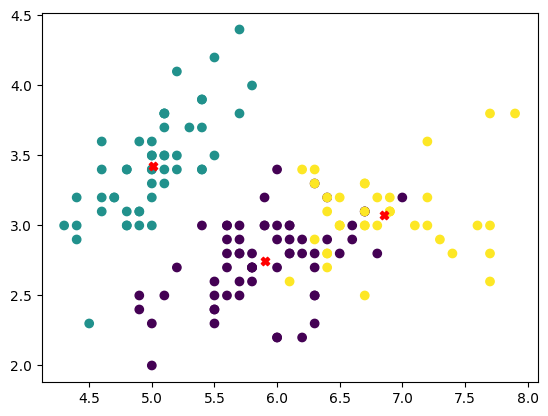

In [56]:
plt.scatter(data[:,0],data[:,1], c=kms.labels_)
plt.scatter(x,y,marker='X',c='r')  # 중심점centernoid 표시
plt.show()

### 분류 시각화 결과 - sepal length/width

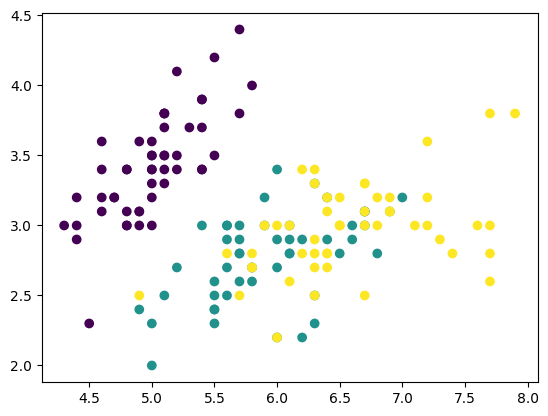

In [50]:
plt.scatter(data[:,0],data[:,1], c=target)
plt.show()

### 군집 시각화 결과 - petal length/width

In [72]:
x, y = centers.pl, centers.pw

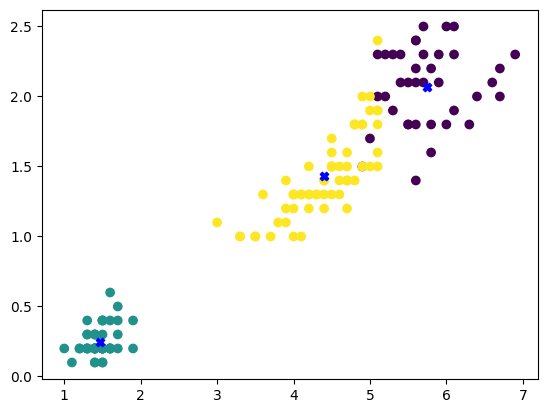

In [73]:
plt.scatter(data[:,2],data[:,3], c=kms.labels_)
plt.scatter(x,y,marker='X',c='b')  # 중심점centernoid 표시
plt.show()

### 분류 시각화 결과 - petal length/width

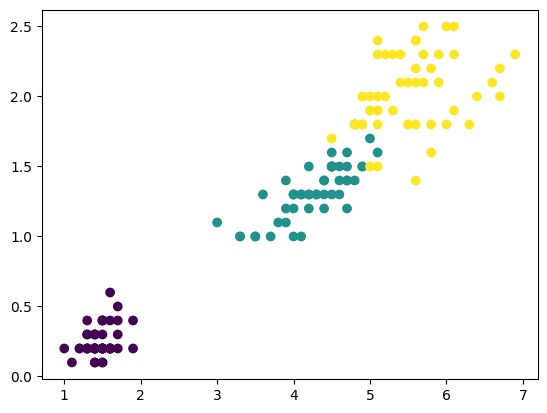

In [69]:
plt.scatter(data[:,2],data[:,3], c=target)
plt.show()

### 실루엣, 엘보우 시각화
* yellowbrick 패키지의 KElbow/Silhouette visualizer 함수 이용
* scikit-yb.org

In [75]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00


In [76]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

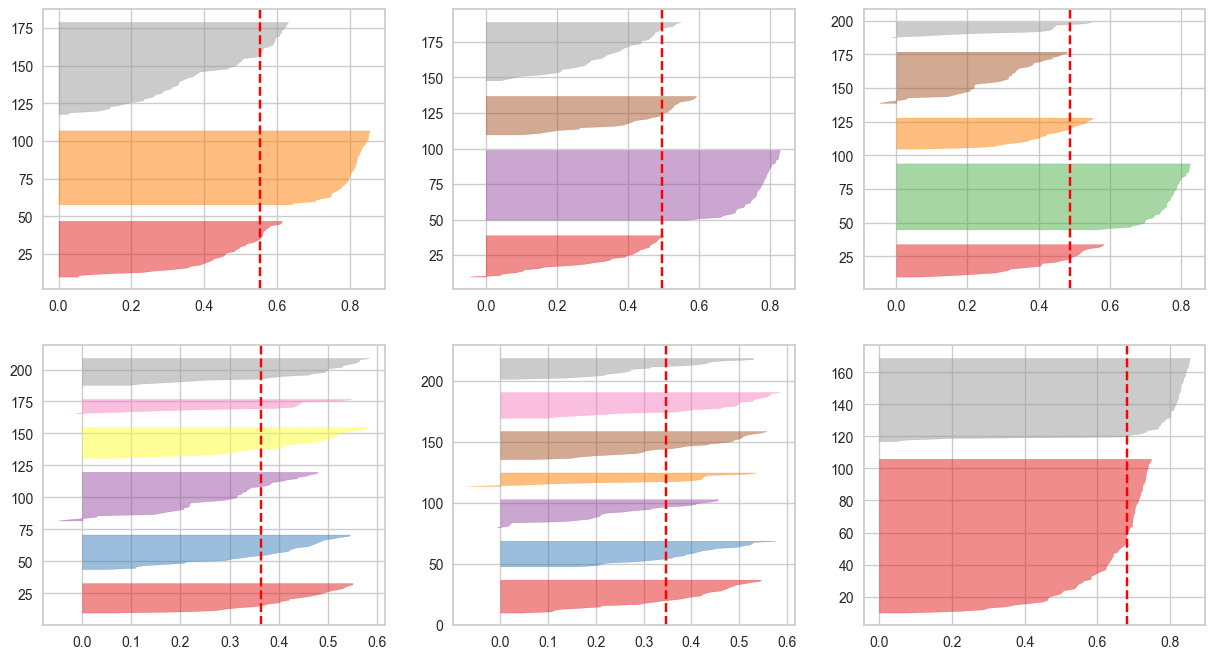

In [77]:
# ax[행][열] : 그래프 출력 위치 지정
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, random_state=2211221505)
    q, mod = divmod(i, 3)
    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(data) 

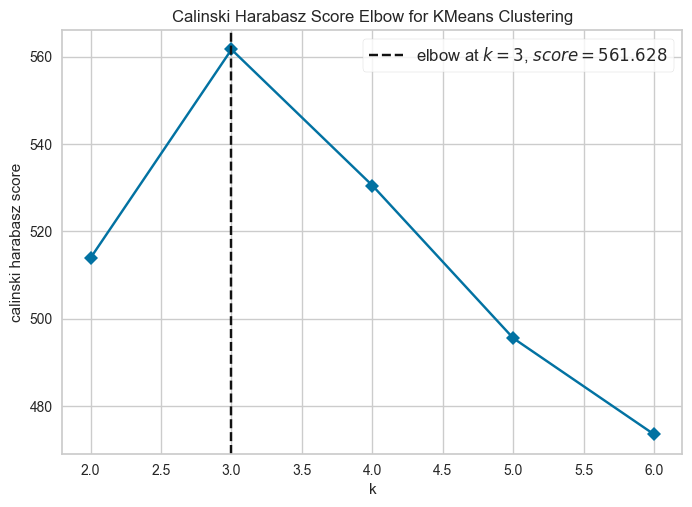

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [83]:
km = KMeans()
# viszr = KElbowVisualizer(km, k=(2,7))
#viszr = KElbowVisualizer(km, k=(2,7), timings=False)
viszr = KElbowVisualizer(km, k=(2,7), metric='calinski_harabasz', timings=False)
viszr.fit(data)
viszr.show()